# Trabajo Práctico 3

## Pablo Toledo Margalef

## Ejercicio 1

Programe los siguientes filtros espaciales.

1. Filtro pasa-bajos promedio.
2. Filtro pasa-altos.
3. Filtro de agudeza.
4. Filtro mediana.
5. Filtros de detección de bordes de primeras diferencias (Prewitt, Robert y Sobel) y de segundas diferencias (Laplaciano). Para el caso de los filtros de primeras diferencia, deberá considerarse alguna de las estrategias vistas en la teoría para combinar (componer) los resultados parciales de los bordes en cada dirección.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [3]:
camera = imageio.imread('imageio:camera.png')

Imageio: 'camera.png' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/images/camera.png (136 kB)
Downloading: 8192/139512 bytes (5.957344/139512 bytes (41.1139512/139512 bytes (100.0%)
  Done
File saved as /home/jovyan/.imageio/images/camera.png.


In [4]:
def convolute_image(im, kernel, operation):
    h,w = im.shape
    
    kernel_h, kernel_w = kernel.shape
    
    even_kernel = kernel_h%2 == 0
    kernel_h_off, kernel_w_off = kernel_h//2,  kernel_w//2
    
    resize_im = np.pad(im, (kernel_h_off,kernel_w_off), mode='edge')
    
    im_out = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):
            if even_kernel:
                i_off = i+kernel_h_off+1
                j_off = j+kernel_w_off+1
            else:
                i_off = i+2*kernel_h_off+1
                j_off = j+2*kernel_w_off+1
            portion = resize_im[
                i: i_off,
                j: j_off
            ]
            im_out[i,j] = operation(portion, kernel)
            
    return im_out

In [5]:
def kernel_sum(portion, kernel):
    return np.sum(kernel*portion)
    
def low_pass(im, order=1):
    kernel = 1/9 * np.ones((2*order+1, 2*order+1))
    
    return convolute_image(im,kernel,kernel_sum)



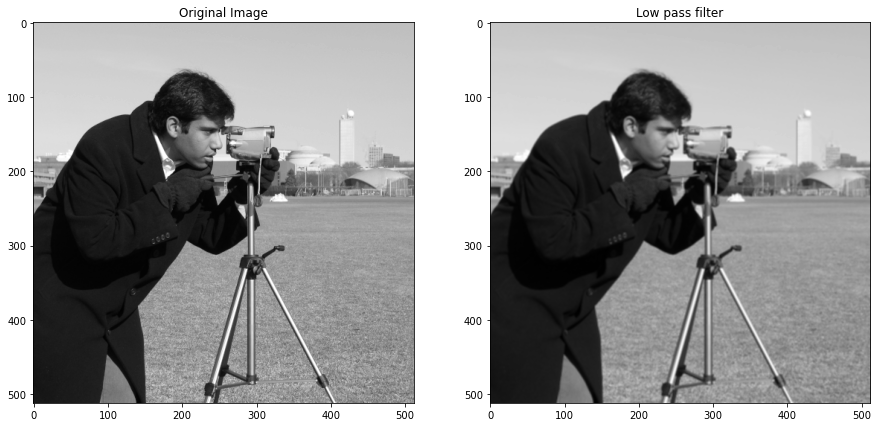

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Low pass filter")
ax[1].imshow(low_pass(camera, order=1), cmap='gray')
plt.show()

In [17]:
def high_pass(im, alpha=1, order=1):
    kernel = 1/9 * np.array([
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ])

    return (im+convolute_image(im, kernel, kernel_sum)).clip(0,255)

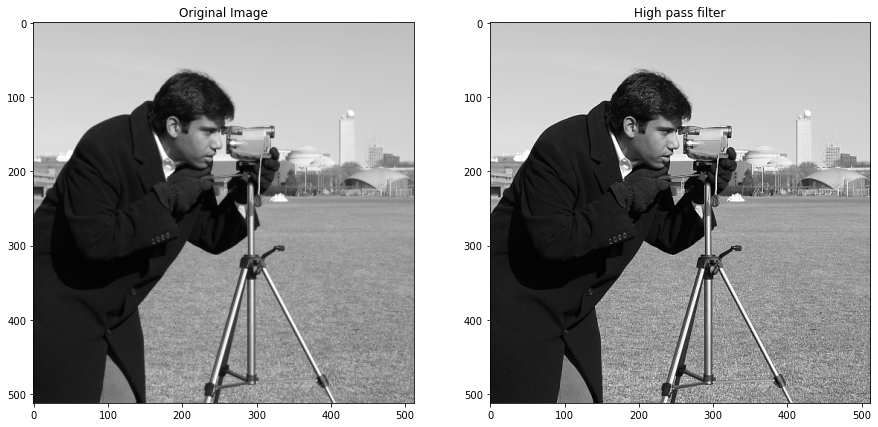

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("High pass filter")
ax[1].imshow(high_pass(camera,alpha=.6, order=1), cmap='gray')
plt.show()

In [13]:
def sharpening(im):
    kernel = np.array([
        [0   ,-1/4,    0],
        [-1/4,   2, -1/4],
        [0   ,-1/4,    0],
    ])
    
    return convolute_image(im, kernel, kernel_sum).clip(0,255)

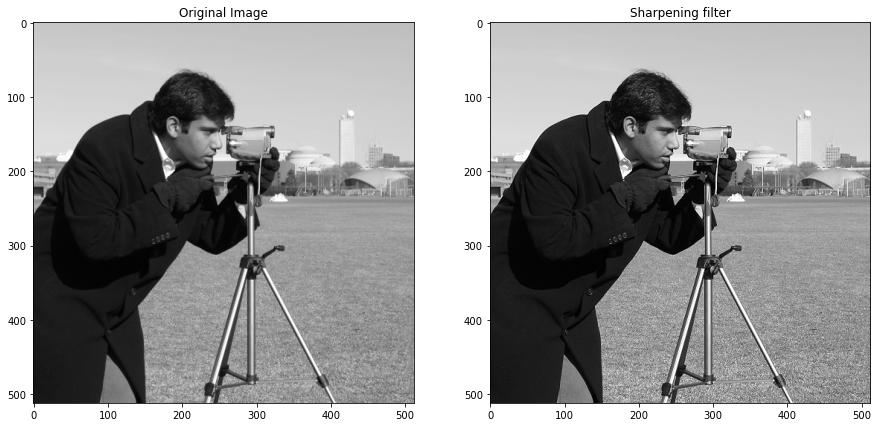

In [14]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Sharpening filter")
ax[1].imshow(sharpening(camera), cmap='gray')
plt.show()

In [110]:
def median_filter(im, order=1):
    kernel = np.ones((2*order+1, 2*order+1))
    def median (portion, kernel):
        return np.median(portion.flat)
    return convolute_image(im, kernel, median)

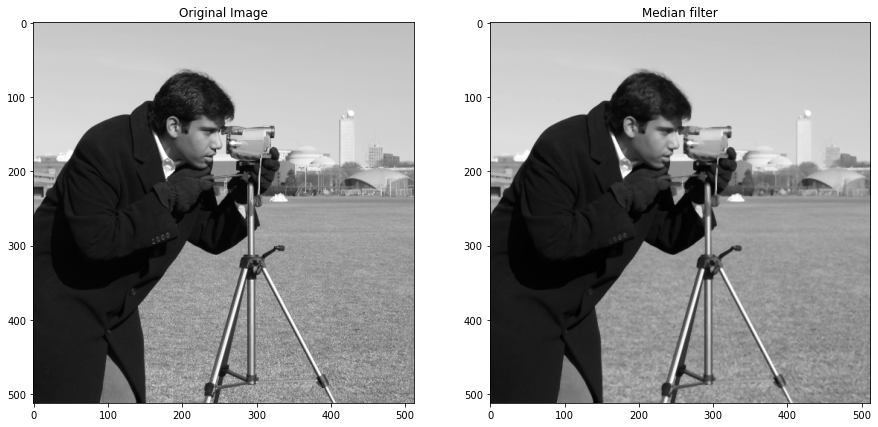

In [111]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Median filter")
ax[1].imshow(median_filter(camera, order=1), cmap='gray')
plt.show()

In [135]:
def roberts(im, g):
    kernel = np.array([
        [1, 0],
        [0,-1]
    ])
    if g=='y':
        kernel = np.rot90(kernel)
    elif g!='x':
        raise ValueError('The parameter g hast to be "x" or "y"')
    
    return np.clip(convolute_image(im, kernel, kernel_sum),0,255)

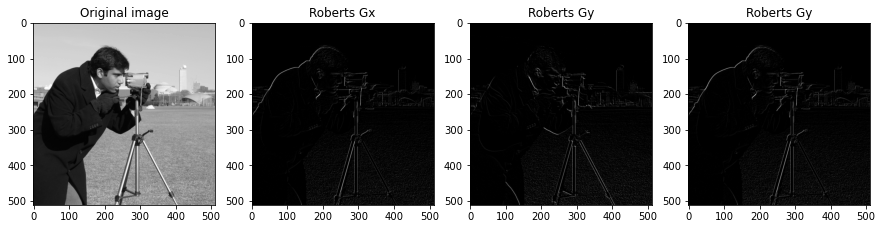

In [155]:
roberts_gx = roberts(camera, g='x')
roberts_gy = roberts(camera, g='y')
gradient_roberts = np.sqrt(roberts_gx**2, roberts_gy**2).clip(0,255)
fig,ax = plt.subplots(1,4, figsize=(15,10))
ax[0].set_title("Original image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Roberts Gx")
ax[1].imshow(roberts_gx, cmap='gray')
ax[2].set_title("Roberts Gy")
ax[2].imshow(roberts_gy, cmap='gray')
ax[3].set_title("Roberts Gy")
ax[3].imshow(gradient_roberts, cmap='gray')

In [138]:
def prewitt(im, g):
    kernel = np.array([
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ])
    
    if g=='y':
        kernel = np.transpose(kernel)
    elif g!='x':
        raise ValueError('The parameter g hast to be "x" or "y"')
    
    return np.clip(convolute_image(im, kernel, kernel_sum),0,255)

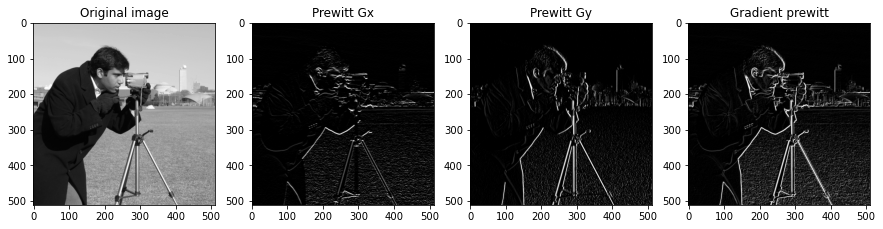

In [158]:
prewitt_gx = prewitt(camera, g='x')
prewitt_gy = prewitt(camera, g='y')
prewitt_gradient = np.sqrt(prewitt_gx**2 + prewitt_gy**2).clip(0,255)
fig,ax = plt.subplots(1,4, figsize=(15,10))
ax[0].set_title("Original image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Prewitt Gx")
ax[1].imshow(prewitt_gx, cmap='gray')
ax[2].set_title("Prewitt Gy")
ax[2].imshow(prewitt_gy, cmap='gray')
ax[3].set_title("Gradient prewitt")
ax[3].imshow(prewitt_gradient, cmap='gray')

In [159]:
def sobel(im, g):
    kernel = np.array([
        [-1,-2,-1],
        [ 0, 0, 0],
        [ 1, 2, 1]
    ])
    
    if g=='y':
        kernel = np.transpose(kernel)
    elif g!='x':
        raise ValueError('The parameter g hast to be "x" or "y"')
    
    return np.clip(convolute_image(im, kernel, kernel_sum),0,255)

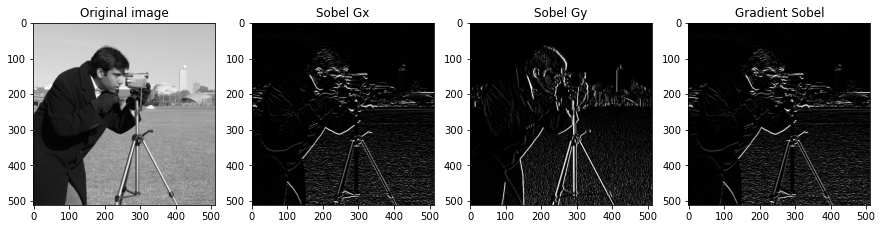

In [162]:
sobel_gx = sobel(camera, g='x')
sobel_gy = sobel(camera, g='y')
sobel_gradient = np.sqrt(sobel_gx**2, sobel_gy**2).clip(0,255)
fig,ax = plt.subplots(1,4, figsize=(15,10))
ax[0].set_title("Original image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Sobel Gx")
ax[1].imshow(sobel_gx, cmap='gray')
ax[2].set_title("Sobel Gy")
ax[2].imshow(sobel_gy, cmap='gray')
ax[3].set_title("Gradient Sobel")
ax[3].imshow(sobel_gradient, cmap='gray')

In [167]:
def laplace(im):
    kernel = np.array([
        [0,1,0],
        [1,-4,1],
        [0,1,0]
    ])
    return convolute_image(im, kernel, kernel_sum).clip(0,255)

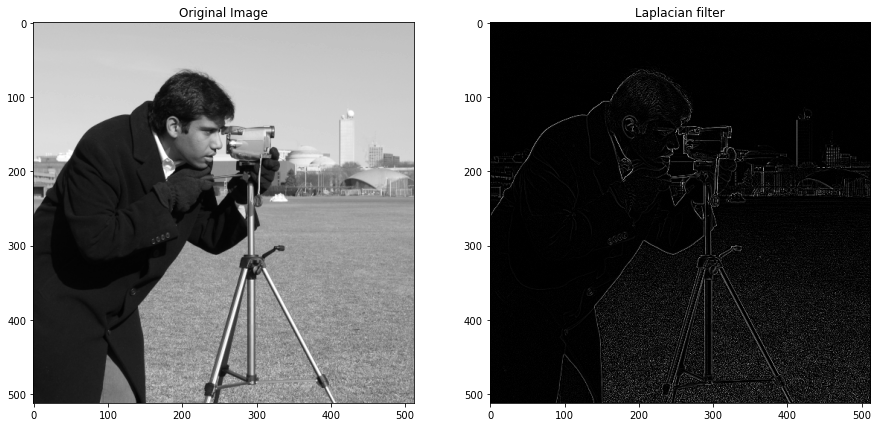

In [168]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Laplacian filter")
ax[1].imshow(laplace(camera), cmap='gray')
plt.show()

## Ejercicio 2

Analizando los pesos de las correspondientes máscaras analice el funcionamiento del filtro de promedio y del pasa-altos. Para el análisis piense regiones de una imagen con el mismo nivel de intensidad y en regiones donde la intensidad varía.

Sabiendo que la máscara utilizada en el filtro de promedio es:

$
\frac{1}{9} \times
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$

podemos indicar que al analizar la vecindad de un pixel tanto sus vecinos como él mismo tienen el mismo peso a la hora de calcular el nuevo valor del píxel en la imagen transformada. En el caso de procesar una imagen que posee un mismo nivel de intensidad, la imágen se verá inalterada, ya que si bien todos los integrantes de una vecindad influyen en el resultado, todos los valores son iguales y el píxel central no se ve afectado. Cuando en una misma vecindad hay distintas intensidades, el píxel central resulta en un promedio de todos los valores de la vecindad.

La máscara del filtro pasa-altos:

$
\frac{1}{9} \times
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{bmatrix}
$

nos indica que el píxel a analizar es mucho más importante que sus vecinos a la hora de analizar la vecindad, pero que sus vecinos, en los casos en que son mayores que cero comienzan cobrar importancia y contrarrestan el nivel del píxel central. En el caso de que no se observe variación entre el píxel central y los bordes el valor resultado tiende a cero, en cambio si hay variación el valor resultado resulta en un valor alto.

## Ejercicio 3

¿Existe una máscara asociada al filtro mediana? Fundamente.

No hay una máscara asociada al filtro de la mediana, porque el valor resultante en cada píxel no depende de la ubicación de valores en la vecindad si no de la distribución de dichos valores.

## Ejercicio 4

¿Cuál es la máscara correspondiente al filtro de agudeza (sharpening)? Considerando los pesos de la máscara, analice los mismos y determine cómo opera el filtro en términos del píxel central y de sus vecinos.

## Ejercicio 5

Realice un breve análisis comparativo de los filtros de detección de bordes implementados. Considere fundamentalmente qué aproximan y cómo operan.

## Ejercicio 6

Programe los siguientes filtros frecuenciales.
1. Filtro pasa-bajos.
2. Filtro pasa-altos.

## Ejercicio 7

Compare el filtrado en el dominio espacial y el filtrado en el dominio frecuencial, teniendo en cuenta cómo son sus métodos de aplicación y cuándo es conveniente aplicar cada uno.

## Ejercicio 8

Indique y fundamente con qué fin aplicaría cada una de los siguientes filtros espaciales:
1. Filtro espacial promedio.
2. Filtro de agudeza (sharpening).
3. Filtro Laplaciano.
4. Un filtro espacial con la siguiente máscara:

$
\begin{bmatrix}
0 & -1 & 0 \\
1 & 0 & -1 \\
0& 1 & 0\
\end{bmatrix}
$

## Ejercicio 9

Ejercicios Integradores. Fundamente cada paso realizado y los parámetros usados. Puede usar Image-Pro Plus® o bien los programas realizados por usted. Aplicar todo lo estudiado hasta el momento para obtener

1. Los bordes de los huesos presentes en la imagen “Fetlock.tif”.
2. El perfil de las células grandes de la imagen “Slide.tif”.
3. El borde de las partículas de la imagen “Spots.tif”.